# DATA PREPARATION

### Overview

This Jupyter notebook is dedicated to the preparation and initial exploration of the Dry Bean Dataset from the UCI Machine Learning Repository. This dataset, identified by UCI ID 602, features images of 13,611 grains from 7 different registered dry bean varieties. Each bean image has been processed to extract a total of 16 features, encompassing both dimensional and shape characteristics.

The dataset was introduced in the study "Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques" by M. Koklu and Ilker Ali Özkan, published in 2020. The aim of the study was to develop a method to classify different varieties of dry beans, an important task for ensuring the uniformity and quality of agricultural produce.

### Dataset Details

- **Number of Instances**: 13,611
- **Number of Features**: 16 (including area, perimeter, axis lengths, ratios, and other shape descriptors)
- **Target Variable**: Bean Class (7 categories: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira)
- **Feature Types**: Integer and Continuous
- **Missing Values**: None


### Objectives of this Notebook

- **Load the Dataset**: Fetch the dataset using the `ucimlrepo` library and explore its basic structure.
- **Exploratory Data Analysis (EDA)**: Conduct a preliminary analysis to understand the distribution and characteristics of the features and target variable.
- **Data Visualization**: Create visual representations of the data to uncover patterns and insights.
- **Preprocessing**: Prepare the data for modeling, which may include normalization, handling of categorical variables, and data splitting.

This notebook serves as the first step in our project, laying the groundwork for subsequent modeling and analysis.

### Downloads & Imports:
Let'd download the data set from UCI ML repo:

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dry_bean_dataset = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean_dataset.data.features 
y = dry_bean_dataset.data.targets 
  
# # metadata 
# print(dry_bean_dataset.metadata) 
  
# # variable information 
# print(dry_bean_dataset.variables) 


In [3]:
#import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Display the first few rows
print(X.head())
print(y.head())

# Dataset shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Check for missing values
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum().sum())


    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913358      0.007332      0.003147 

No missing values as advertised!

In [5]:
#### Save the Data (Optional)
#If needed, save the processed data to CSV files for easy access in other notebooks.

# X.to_csv('features.csv', index=False)
# y.to_csv('targets.csv', index=False)

### Exploratory Data Analysis (EDA)

In [6]:
# Basic information about the dataset
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB
None
<class 

In [7]:
# # Descriptive statistics for the features
# print(X.describe())

In [8]:
# X is features DataFrame
stats = X.describe().loc[['min', 'max', 'mean', 'std']]

# Transpose the DataFrame for a similar format to Table 2
stats = stats.T

# Rename the columns as per the table in the paper
stats.columns = ['Min.', 'Max.', 'Mean', 'Std. Deviation']

# Display the DataFrame
print(stats)

                         Min.           Max.          Mean  Std. Deviation
Area             20420.000000  254616.000000  53048.284549    29324.095717
Perimeter          524.736000    1985.370000    855.283459      214.289696
MajorAxisLength    183.601165     738.860154    320.141867       85.694186
MinorAxisLength    122.512653     460.198497    202.270714       44.970091
AspectRatio          1.024868       2.430306      1.583242        0.246678
Eccentricity         0.218951       0.911423      0.750895        0.092002
ConvexArea       20684.000000  263261.000000  53768.200206    29774.915817
EquivDiameter      161.243764     569.374358    253.064220       59.177120
Extent               0.555315       0.866195      0.749733        0.049086
Solidity             0.919246       0.994677      0.987143        0.004660
Roundness            0.489618       0.990685      0.873282        0.059520
Compactness          0.640577       0.987303      0.799864        0.061713
ShapeFactor1         0.00

In [9]:
# Checking for class distribution in the target variable
print(y['Class'].value_counts())

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


In [10]:
# Styling for display in Jupyter Notebook
styled_table2 = stats.style.set_table_styles(
    [{"selector": "th", "props": [("font-size", "12pt"), ("text-align", "center")]}]
).set_properties(**{"font-size": "12pt", "text-align": "center"})#.background_gradient(cmap='magma')

# Display styled tables in the notebook
styled_table2


,Min.,Max.,Mean,Std. Deviation
Area,20420.000000,254616.000000,53048.284549,29324.095717
Perimeter,524.736000,1985.370000,855.283459,214.289696
MajorAxisLength,183.601165,738.860154,320.141867,85.694186
MinorAxisLength,122.512653,460.198497,202.270714,44.970091
AspectRatio,1.024868,2.430306,1.583242,0.246678
Eccentricity,0.218951,0.911423,0.750895,0.092002
ConvexArea,20684.000000,263261.000000,53768.200206,29774.915817
EquivDiameter,161.243764,569.374358,253.064220,59.177120
Extent,0.555315,0.866195,0.749733,0.049086
Solidity,0.919246,0.994677,0.987143,0.004660


In [11]:
# Export styled tables as HTML using to_html()
with open("Table2_Statistical_Distribution.html", "w") as f:
    f.write(styled_table2.to_html())

### DataVisualization

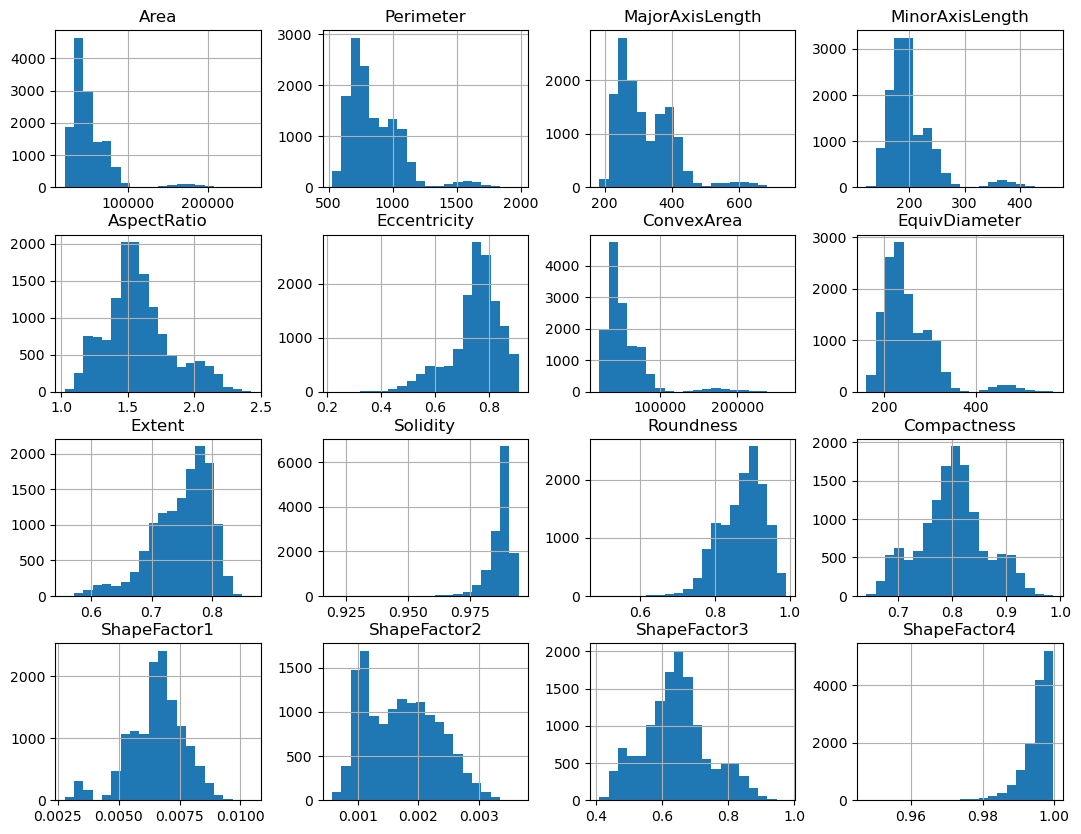

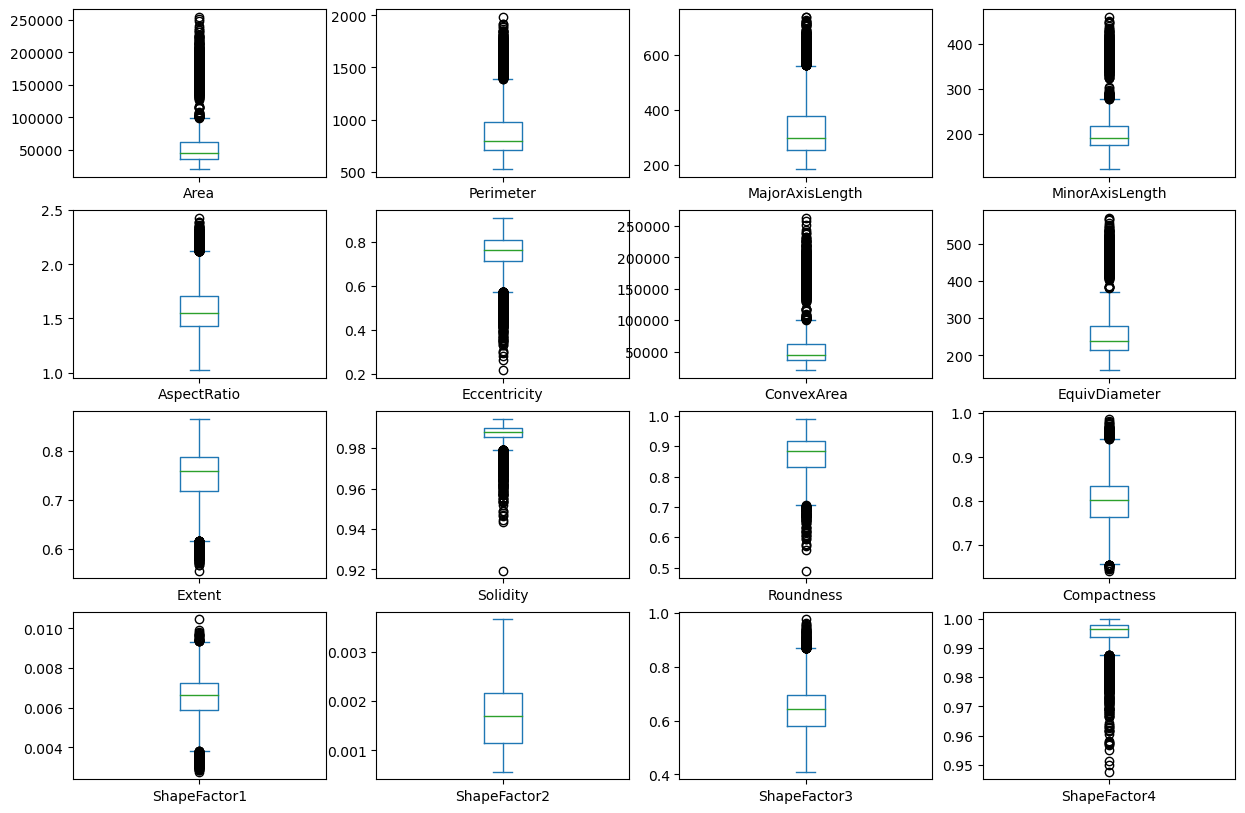

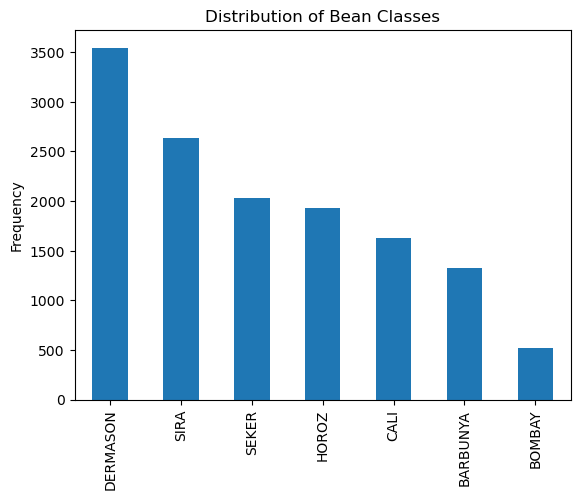

In [12]:
# Histograms for features
X.hist(bins=20, figsize=(13, 10))
plt.show()

# Boxplots for features
X.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,10))
plt.show()

# Bar chart for the distribution of the target variable
y['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Bean Classes')
plt.ylabel('Frequency')
plt.show()


### Advanced Exploratory Data Analysis (A-EDA)

In [13]:
# Assign a column name to the target variable, e.g., 'Bean_Type'
y.columns = ['Bean_Type']
# Concatenate X and y to create a combined DataFrame
combined_df = pd.concat([X, y], axis=1)
# # Verify the combined DataFrame
# print(combined_df.head())

In [14]:
# # Pair plot
# sns.set(style="whitegrid")
# sns.pairplot(combined_df, hue='Bean_Type', palette='husl')
# plt.show()


In [15]:
# # Heatmap of Correlation Matrix: 
# plt.figure(figsize=(12, 8))
# sns.heatmap(X.corr(), annot=True, fmt=".2f")
# plt.show()

In [16]:
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=X, orient="h", palette="Set2")
# plt.title("Box plot of Features")
# plt.show()

### Normalized data

this box plot is dominated by two features, lets normalize data first:

In [17]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
X_normalized = scaler.fit_transform(X)

# Convert the normalized data back to a DataFrame for easier plotting
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

In [18]:
# X_normalized_df.head()

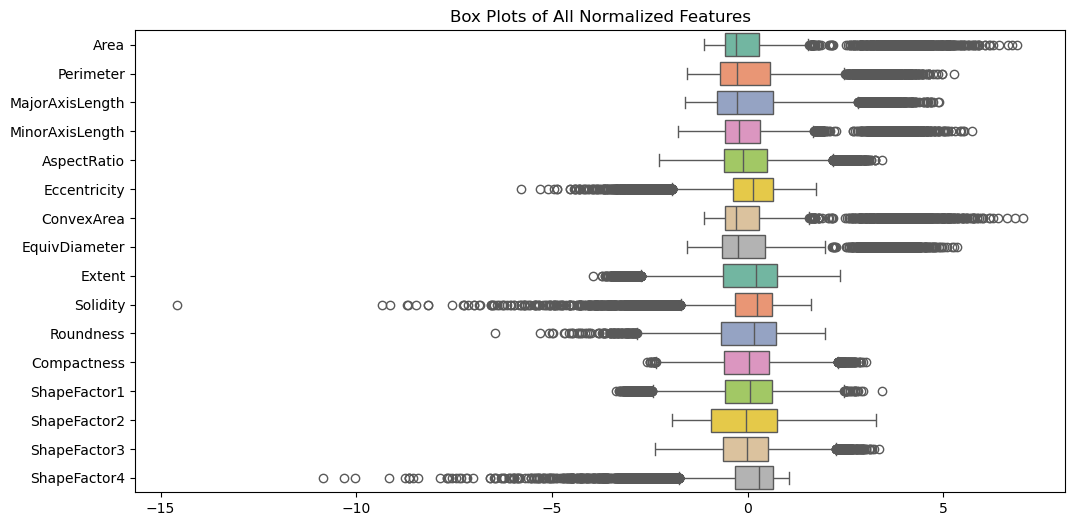

In [19]:
# Set the size for the plots
plt.figure(figsize=(12, 6))

# Create boxplots for all normalized features
sns.boxplot(data=X_normalized_df, orient="h", palette="Set2")

# Title
plt.title('Box Plots of All Normalized Features')

# Show the plot
plt.show()

Clearly there are a ton of outlier data in the data set

### Outliers

## HER column icin ayri hesaplanacak , duzelt burayi

In [20]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

In [21]:
# Identify outliers for each feature
# these are the data that are ~ 2.7 sigma away from mean
outliers = ((X < (Q1 - 2*IQR)) | (X > (Q3 + 2*IQR)))

# Count number of outliers for each feature
outlier_counts = outliers.sum()
print(outlier_counts)

Area               526
Perimeter          366
MajorAxisLength    154
MinorAxisLength    525
AspectRatio         60
Eccentricity       363
ConvexArea         526
EquivDiameter      515
Extent              26
Solidity           503
Roundness           31
Compactness          3
ShapeFactor1        46
ShapeFactor2         0
ShapeFactor3        21
ShapeFactor4       480
dtype: int64


In [34]:
X_clean = X[~((X < (Q1 - 2.5*IQR)) | (X > (Q3 + 2.5*IQR))).any(axis=1)]
y_clean = y[~((X < (Q1 - 2.5*IQR)) | (X > (Q3 + 2.5*IQR))).any(axis=1)]

I decided not to go down this road since its not mentioned in the paper

In [35]:
X_clean.shape , X.shape

((12528, 16), (13611, 16))

In [37]:
X_dirty = X[((X < (Q1 - 2.5*IQR)) | (X > (Q3 + 2.5*IQR))).any(axis=1)]
y_drity = y[((X < (Q1 - 2.5*IQR)) | (X > (Q3 + 2.5*IQR))).any(axis=1)]

In [48]:
y_drity.value_counts() , y.value_counts()

(Bean_Type
 BOMBAY       522
 HOROZ        177
 SEKER        142
 CALI         130
 BARBUNYA      62
 DERMASON      31
 SIRA          19
 dtype: int64,
 Bean_Type
 DERMASON     3546
 SIRA         2636
 SEKER        2027
 HOROZ        1928
 CALI         1630
 BARBUNYA     1322
 BOMBAY        522
 dtype: int64)